In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
tickers = pd.read_html("https://en.wikipedia.org/wiki/NIFTY_50", match="Company Name")[0]

In [3]:
tickers['Symbol'] = tickers['Symbol'].astype(str) + '.NS'
tickers

,Company Name,Symbol,Sector
0,Adani Ports,ADANIPORTS.NS,Infrastructure
1,Apollo Hospitals,APOLLOHOSP.NS,Healthcare
2,Asian Paints,ASIANPAINT.NS,Consumer Goods
3,Axis Bank,AXISBANK.NS,Banking
4,Bajaj Auto,BAJAJ-AUTO.NS,Automobile
5,Bajaj Finance,BAJFINANCE.NS,Financial Services
6,Bajaj Finserv,BAJAJFINSV.NS,Financial Services
7,Bharti Airtel,BHARTIARTL.NS,Telecommunication
8,Bharat Petroleum,BPCL.NS,Energy - Oil & Gas
9,Britannia Industries,BRITANNIA.NS,Consumer Goods


In [4]:
symbols = tickers.Symbol.to_list()

In [5]:
symbols

['ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BHARTIARTL.NS',
 'BPCL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFC.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SUNPHARMA.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'UPL.NS',
 'WIPRO.NS']

In [35]:
def rsicalc(asset):
    df = yf.download(asset, start="2010-01-01")
    df['MA200'] = df['Close'].rolling(window=200).mean()
    df['price change'] = df['Close'].pct_change()
    df['upmove'] = df['price change'].apply(lambda x: x if x>0 else 0)
    df['downmove'] = df['price change'].apply(lambda x: abs(x) if x<0 else 0)
    df['avg up'] = df['upmove'].ewm(span=19).mean()
    df['avg down'] = df['downmove'].ewm(span=19).mean()
    df = df.dropna()
    
    df['RS'] = df['avg up']/df['avg down']
    df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))
    
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
    return df

In [8]:
def getsignals(df):
    buying_dates = []
    selling_dates = []
    
    for i in range(len(df)-11):
        if "Yes" in df['Buy'].iloc[i]:
            buying_dates.append(df.iloc[i+1].name)
            for j in range(1,11):
                if df['RSI'].iloc[i+j] > 40:
                    selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j==10:
                    selling_dates.append(df.iloc[i+j+1].name)
                    
    return buying_dates, selling_dates

In [27]:
frame = rsicalc(symbols[17])
buy, sell = getsignals(frame)

[*********************100%***********************]  1 of 1 completed


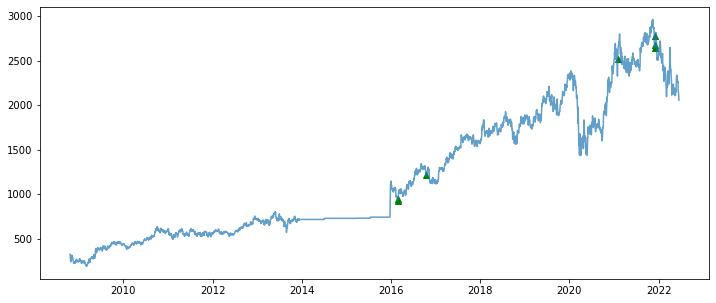

In [28]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index, frame.loc[buy]['Adj Close'], marker='^', c='g')
plt.plot(frame['Adj Close'], alpha=0.7)

In [29]:
profits = ((frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values)*100
print(profits)
print(len(profits))

[2.01750573 4.89236791 1.34993846 9.25209362 1.63934426 4.69043152
 3.2931619 ]
7


In [30]:
sum(profits)

27.13484339966738

# Test on all companies

In [36]:
matrixsignals = []
matrixprofits = []

for i in range(len(symbols)):
    frame = rsicalc(symbols[i])
    buy, sell = getsignals(frame)
    profits = ((frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values)*100
    matrixsignals.append(buy)
    matrixprofits.append(profits)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [37]:
allprofit = []

for i in matrixprofits:
    for e in i:
        allprofit.append(e)

In [38]:
sum(allprofit)

569.1593938905471

# 